# Multiple regression model

This example generates synthetic data for advertising spend, number of salespeople, and sales. It then performs multiple linear regression analysis using the `Advertising_Spend` and `Num_Salespeople` as independent variables to predict `Sales`. The code also includes visualization to compare actual vs. predicted sales.

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [86]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
advertising_spend = np.random.uniform(50, 200, num_samples)
num_salespeople = np.random.randint(3, 10, num_samples)
error_term = np.random.normal(0, 20, num_samples)

sales = 50 + 2 * advertising_spend + 5 * num_salespeople + error_term

In [87]:
# Create a DataFrame
df = pd.DataFrame({'Advertising_Spend': advertising_spend, 'Num_Salespeople': num_salespeople, 'Sales': sales})
df.head()

,Advertising_Spend,Num_Salespeople,Sales
0,106.181018,6,282.863129
1,192.607146,5,447.147707
2,159.799091,3,419.907267
3,139.798773,6,367.697179
4,73.402796,8,211.587913


In [88]:
df.shape

(200, 3)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


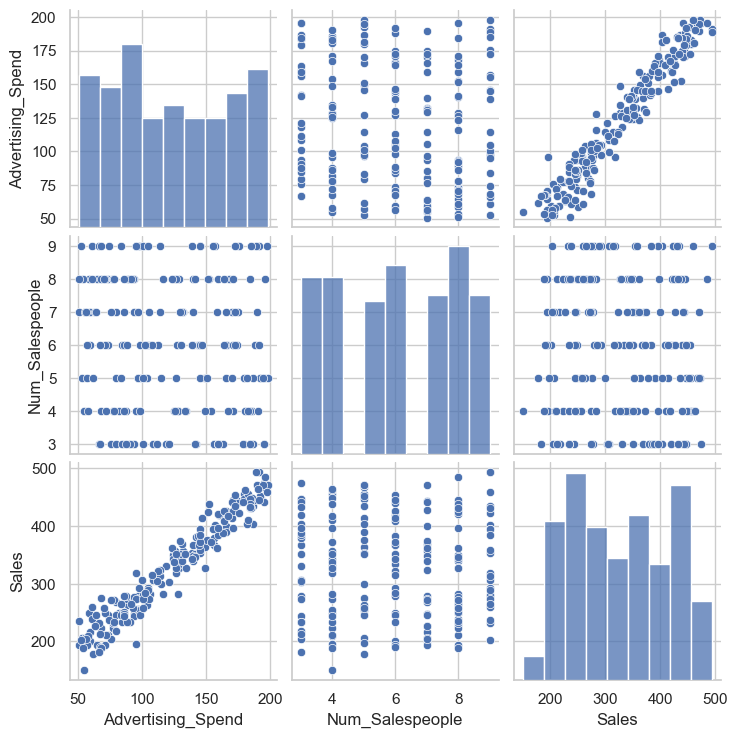

In [89]:
sns.pairplot(df)

In [90]:
df.corr()

,Advertising_Spend,Num_Salespeople,Sales
Advertising_Spend,1.000000,-0.158467,0.970023
Num_Salespeople,-0.158467,1.000000,-0.058324
Sales,0.970023,-0.058324,1.000000


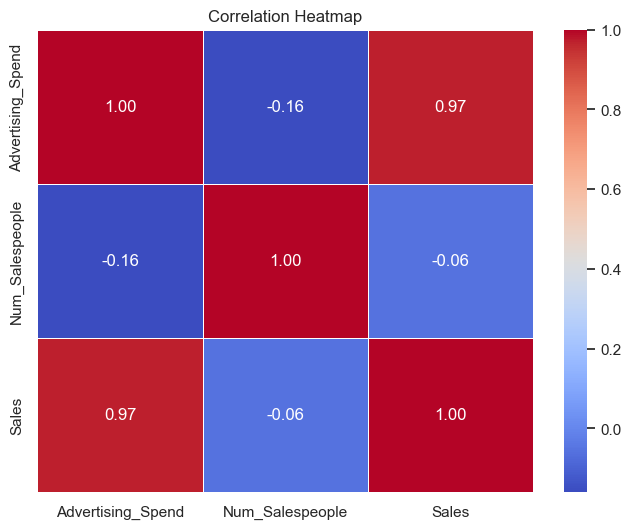

In [91]:
# Assuming df is your DataFrame containing the data
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# using the gradient dicent method


In [92]:
df.head()

,Advertising_Spend,Num_Salespeople,Sales
0,106.181018,6,282.863129
1,192.607146,5,447.147707
2,159.799091,3,419.907267
3,139.798773,6,367.697179
4,73.402796,8,211.587913


In [93]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [94]:
X.head()

,Advertising_Spend,Num_Salespeople
0,106.181018,6
1,192.607146,5
2,159.799091,3
3,139.798773,6
4,73.402796,8


In [95]:
y

0      282.863129
1      447.147707
2      419.907267
3      367.697179
4      211.587913
          ...    
195    284.108977
196    361.437862
197    432.350677
198    410.036537
199    417.356115
Name: Sales, Length: 200, dtype: float64

In [96]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

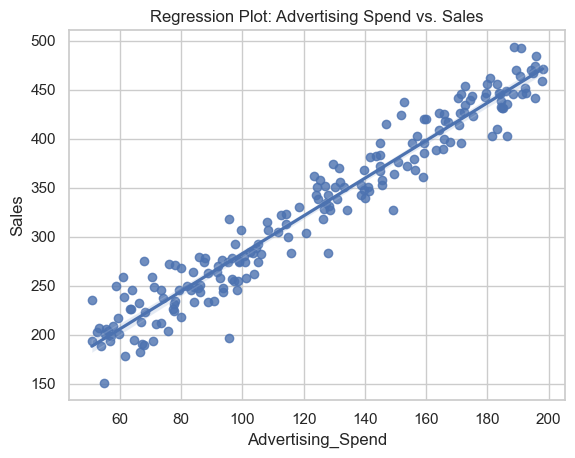

In [97]:
# this method of fitting line only works for one column not multiple columns together.

# Assuming df is your DataFrame containing the data
sns.regplot(data=df, x='Advertising_Spend', y='Sales')
plt.title('Regression Plot: Advertising Spend vs. Sales')
plt.show()

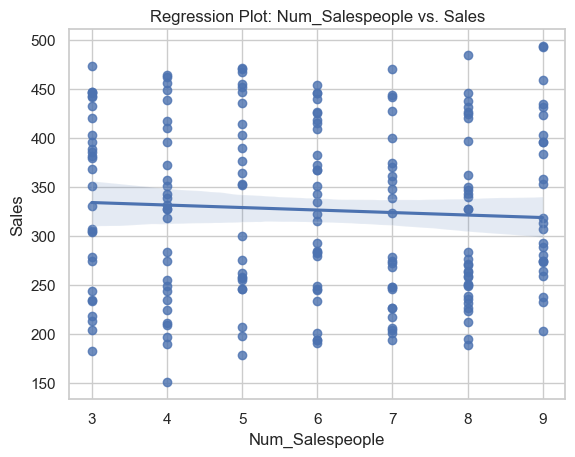

In [98]:
# Assuming df is your DataFrame containing the data
sns.regplot(data=df, x='Num_Salespeople', y='Sales')
plt.title('Regression Plot: Num_Salespeople vs. Sales')
plt.show()

so not a good fit.

In [99]:
from sklearn .preprocessing import StandardScaler

In [100]:
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [101]:
X_train

array([[ 0.49832067,  1.52411258],
       [-0.87769735,  1.52411258],
       [-1.11610751,  0.01009346],
       [ 1.12260942,  0.01009346],
       [-1.01271192, -0.99925262],
       [ 1.11397494,  0.5147665 ],
       [ 1.61102885, -0.49457958],
       [-1.55766704,  1.01943954],
       [ 0.08809105, -0.49457958],
       [ 0.12407097, -0.99925262],
       [ 0.35456423,  0.01009346],
       [-0.19783387,  1.52411258],
       [-1.06697356, -1.50392565],
       [ 1.17139936,  0.5147665 ],
       [ 1.09008674,  1.01943954],
       [ 0.18023809,  0.5147665 ],
       [-1.52733574,  0.5147665 ],
       [-0.82576708, -0.99925262],
       [-1.23920029, -0.99925262],
       [ 0.11073983, -0.99925262],
       [ 0.97759795,  0.01009346],
       [ 1.26705912, -1.50392565],
       [ 0.4987466 ,  0.01009346],
       [ 0.03088666,  1.01943954],
       [ 1.3746915 , -1.50392565],
       [ 1.08915013, -0.99925262],
       [-0.96839979,  0.5147665 ],
       [ 1.64259578,  1.01943954],
       [-1.53734316,

In [102]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [103]:
regression.fit(X_train, y_train)

LinearRegression()

Cross-validation is a statistical technique used in machine learning to assess the performance and generalizability of a predictive model. The primary goal of cross-validation is to ensure that a model trained on a particular dataset can generalize well to new, unseen data. It helps in estimating how well the model will perform on an independent dataset.

The process involves partitioning the dataset into multiple subsets, called folds. The model is trained on a subset of the data (training set) and evaluated on the remaining data (validation or test set). This process is repeated multiple times, each time using a different subset as the validation set. The most common form of cross-validation is k-fold cross-validation.

Here's a step-by-step explanation of k-fold cross-validation:

1. **Dataset Splitting:**
   - The dataset is divided into k equally sized folds.

2. **Model Training and Evaluation:**
   - The model is trained on k-1 folds (training set).
   - The model is evaluated on the remaining fold (validation or test set).

3. **Iteration:**
   - Steps 1 and 2 are repeated k times, each time using a different fold as the validation set.

4. **Performance Metrics:**
   - The performance metrics (e.g., accuracy, mean squared error) are averaged over the k iterations to obtain a more robust estimation of the model's performance.

Common variants of k-fold cross-validation include:

- **Stratified K-Fold:** Ensures that each fold maintains the same class distribution as the original dataset, which is particularly useful for imbalanced datasets.
  
- **Leave-One-Out (LOO):** Each observation is used as a validation set exactly once.

- **Leave-P-Out:** Similar to LOO, but leaves out p observations from the dataset.

Cross-validation helps in assessing how well a model generalizes to different subsets of the data, reducing the risk of overfitting to a specific training set. It provides a more reliable estimate of a model's performance compared to a single train-test split. The choice of k in k-fold cross-validation depends on the size and characteristics of the dataset, with common values being 5 or 10.

In [104]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [105]:
validation_score

array([-437.35690029, -363.86846439, -321.13612303])

In [106]:
np.mean(validation_score)

-374.1204959020976

so what it do is the calculated MSE in the previous step take average of the three MSEs.

In [107]:
## prediction
y_pred = regression.predict(X_test)

In [108]:
y_pred

array([336.31953241, 230.98031925, 354.85646573, 256.52714113,
       190.56775993, 436.9713622 , 474.63132894, 391.33644273,
       375.43203444, 377.52265579, 230.67648398, 468.42578241,
       441.66376239, 286.49384457, 436.25086218, 298.06072683,
       211.87592211, 219.45125836, 290.65455549, 210.80548273,
       250.51894003, 267.15686268, 191.48422964, 344.10829133,
       347.85592731, 289.33163615, 278.48518741, 425.54561289,
       313.25096701, 227.47534894, 384.95257518, 308.49216133,
       458.27124013, 406.73745088, 444.88668451, 447.78078436,
       272.83333619, 402.06056075, 212.41399033, 416.28676061,
       216.9684576 , 441.5469    , 393.33291544, 309.50774072,
       286.7941699 , 286.82621692, 193.08233037, 272.57145657,
       281.66721771, 391.39932997])

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [110]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"The Mean squared error is: {mse}")
print(f"The mean absolute error is: {mae}")
print(f"The root mean squared error is: {rmse}")

The Mean squared error is: 508.99064011586074
The mean absolute error is: 17.628284263814095
The root mean squared error is: 22.560820909618087


In [111]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(f"The r-squared value for the model is= {score}")

The r-squared value for the model is= 0.9326105266469662


In [112]:
## displaying adjusted r squared value 
1 - (1-score)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)

0.9297428894830073

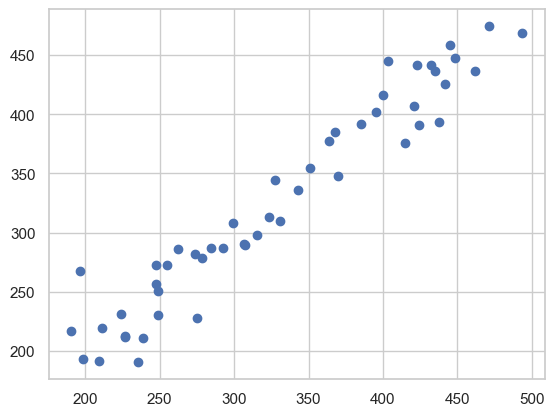

In [113]:
plt.scatter(y_test,y_pred)

In [114]:
residuals = y_test-y_pred

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


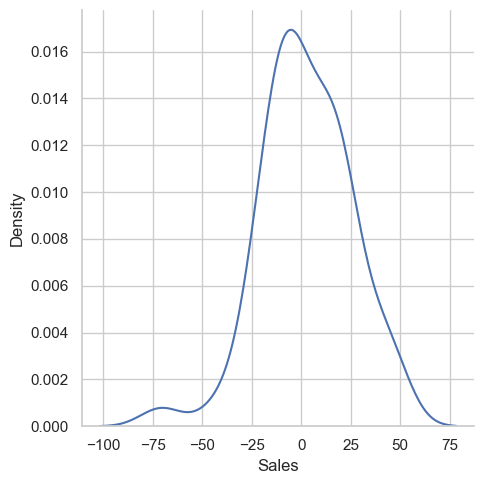

In [115]:
# plot residuals
sns.displot(residuals, kind='kde')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

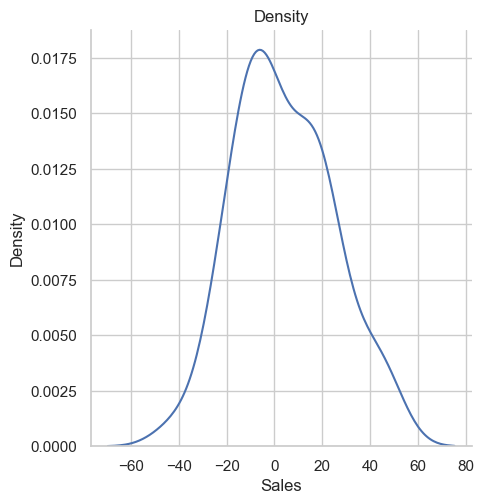

In [79]:
# Calculate mean and standard deviation of residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()

# Set a threshold for outliers (e.g., 3 standard deviations)
threshold = 3 * std_residuals

# Remove outliers
residuals_no_outliers = residuals[abs(residuals) <= threshold]

# Plot residuals without outliers
plt.figure(figsize=(8, 6))
sns.displot(residuals_no_outliers, kind='kde')
plt.title('Density')
plt.xlabel('Sales')
plt.show()

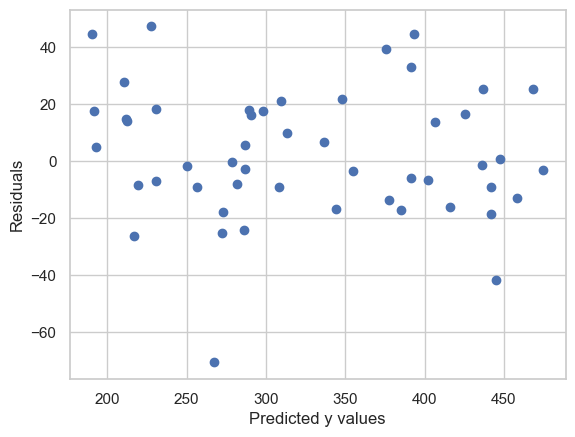

In [80]:
## scatter plot wutg respect ti predcition and residuals
plt.scatter(y_pred, residuals)

plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
plt.show()

In [116]:
import statsmodels.api as sm 
model = sm.OLS(y_train, X_train).fit()

In [117]:
prediction = model.predict(X_test)
print(prediction)

[  10.65695228  -94.68226088   29.1938856   -69.135439   -135.0948202
  111.30878207  148.96874881   65.6738626    49.76945431   51.86007566
  -94.98609615  142.76320228  116.00118226  -39.16873556  110.58828205
  -27.6018533  -113.78665802 -106.21132177  -35.00802464 -114.8570974
  -75.1436401   -58.50571745 -134.17835049   18.4457112    22.19334718
  -36.33094398  -47.17739272   99.88303276  -12.41161312  -98.18723119
   59.28999505  -17.1704188   132.60866      81.07487075  119.22410438
  122.11820424  -52.82924394   76.39798062 -113.2485898    90.62418048
 -108.69412253  115.88431987   67.67033531  -16.1548394   -38.86841023
  -38.8363632  -132.58024976  -53.09112356  -43.99536242   65.73674984]


In [83]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              5.115
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                     0.00711
Time:                        15:15:48   Log-Likelihood:                         -1081.0
No. Observations:                 150   AIC:                                      2166.
Df Residuals:                     148   BIC:                                      2172.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [84]:
print(regression.coef_)

[86.62120427  6.33750727]


so we have similar coefficients in the two methods,

# EDA on Medium.com blog reach

In [62]:
df1 = pd.read_csv("c://Users/hp/Desktop/arunp77-subscriber-stats.csv")

In [54]:
df1.head()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,referred_members_gained,referred_members_lost,referred_members_net,referred_members_total,referred_member_earnings
0,2024-01-01,2024-01-31,1,0,1,65,0,0,0,5,0,0,0,0,$0.00
1,2023-12-01,2023-12-31,19,0,19,64,2,0,2,5,0,0,0,0,$0.00
2,2023-11-01,2023-11-30,7,0,7,45,0,0,0,3,0,0,0,0,$0.00
3,2023-10-01,2023-10-31,4,0,4,38,2,0,2,3,0,0,0,0,$0.00
4,2023-09-01,2023-09-30,2,0,2,34,0,0,0,1,0,0,0,0,$0.00


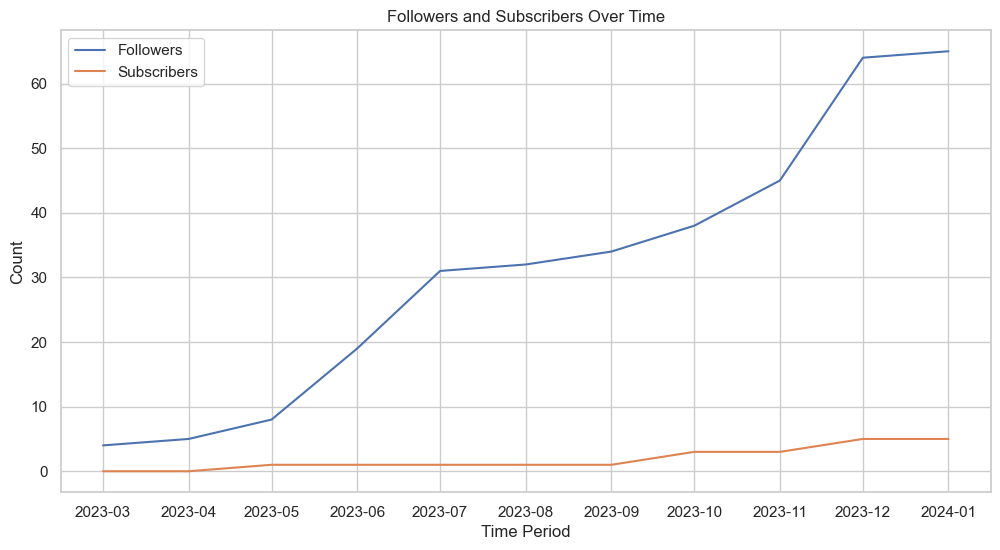

In [58]:
df1['period_start'] = pd.to_datetime(df1['period_start'])
df1['period_end'] = pd.to_datetime(df1['period_end'])

# Set seaborn style
sns.set(style="whitegrid")

# Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='period_start', y='followers_total', data=df1, label='Followers')
sns.lineplot(x='period_start', y='subscribers_total', data=df1, label='Subscribers')
plt.title('Followers and Subscribers Over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

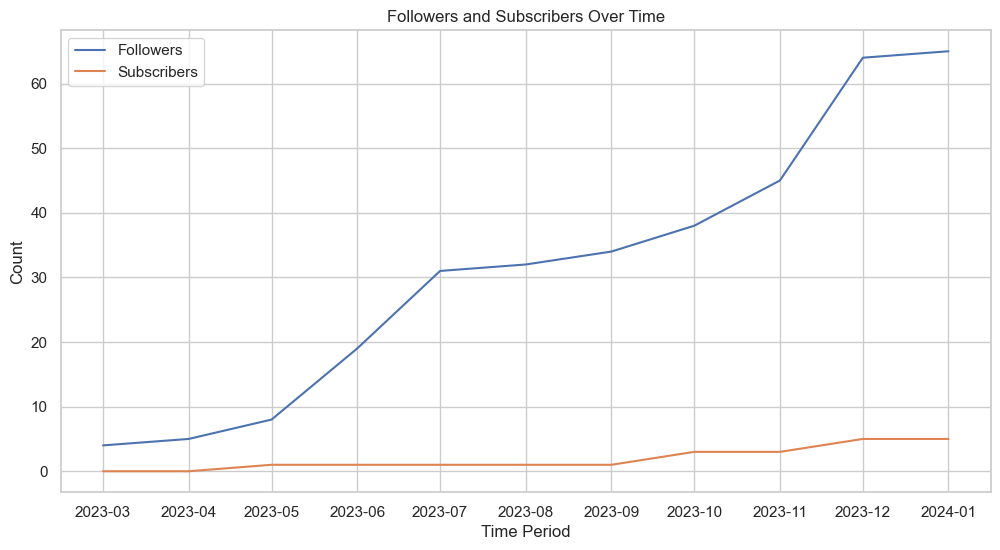

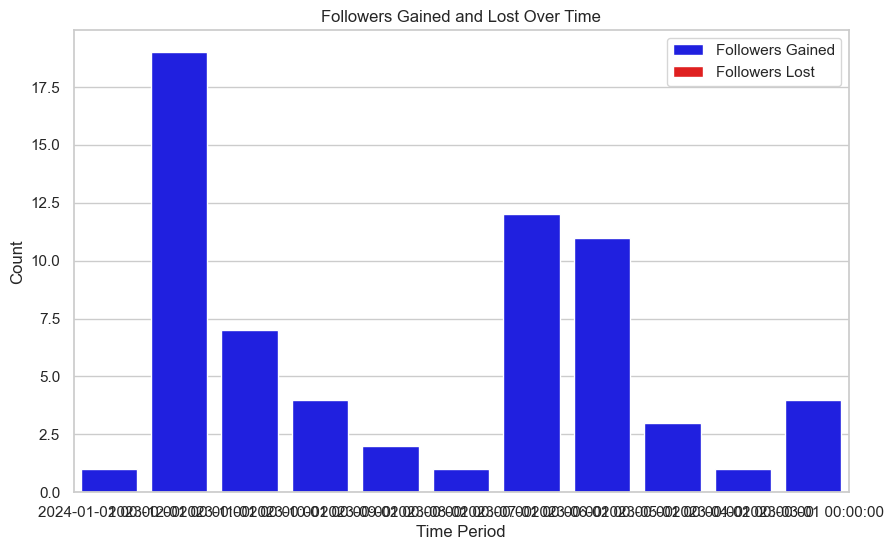

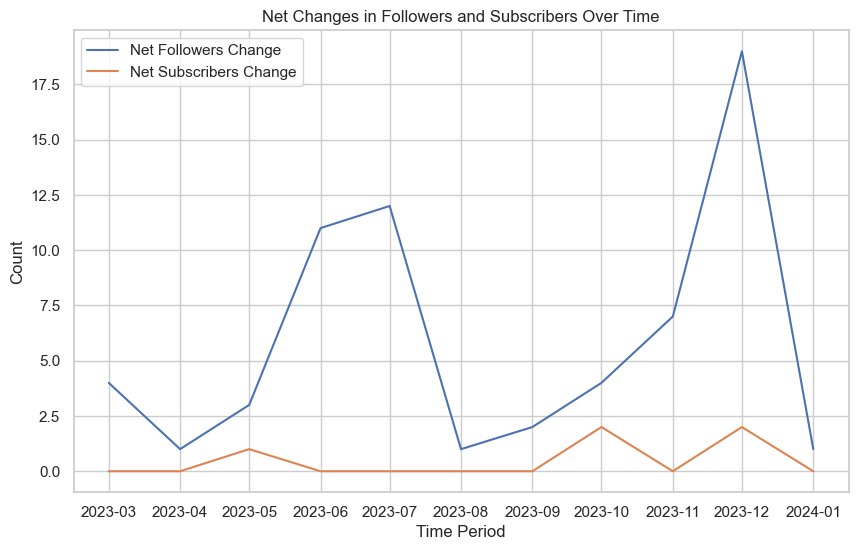

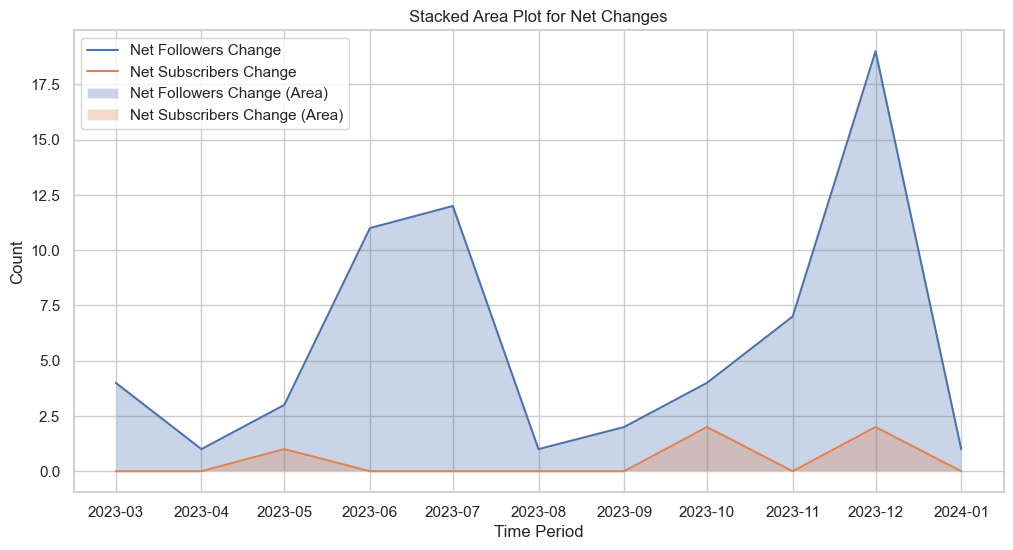

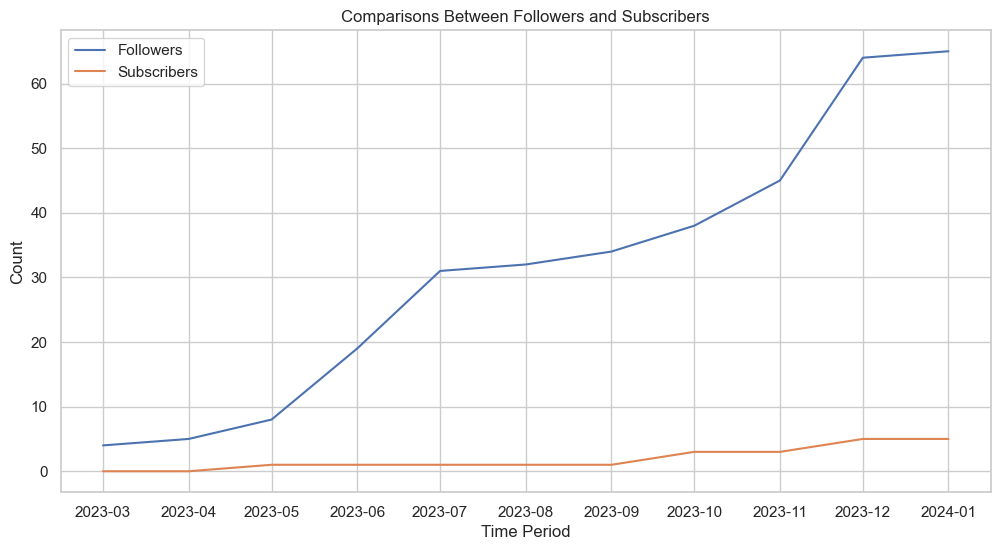

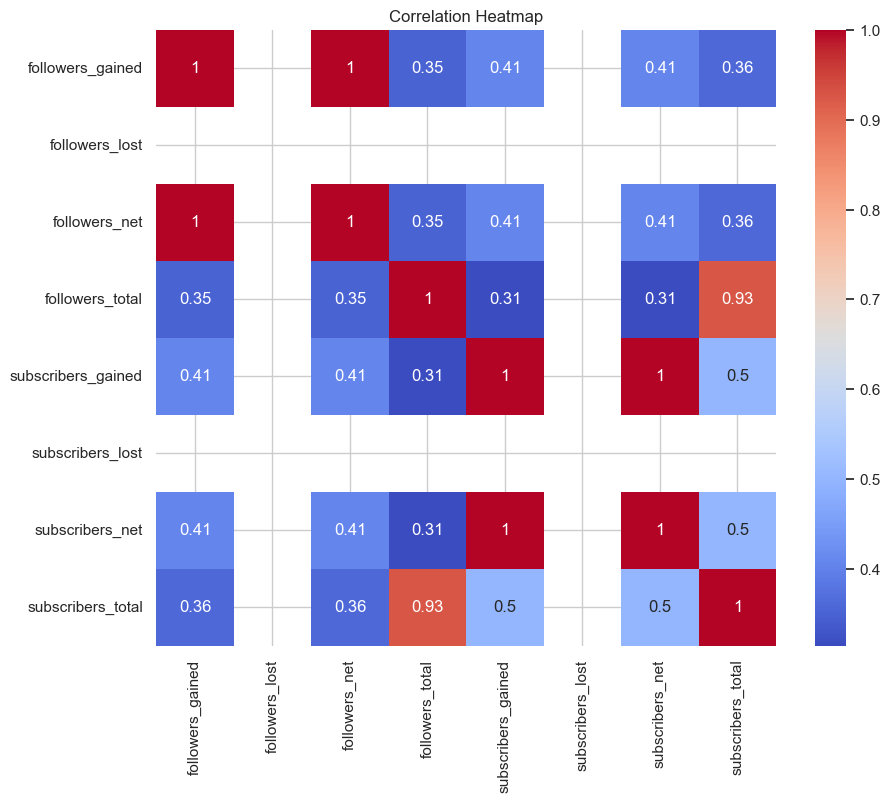

In [60]:
# Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='period_start', y='followers_total', data=df1, label='Followers')
sns.lineplot(x='period_start', y='subscribers_total', data=df1, label='Subscribers')
plt.title('Followers and Subscribers Over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

# Bar Charts for Gained and Lost
plt.figure(figsize=(10, 6))
sns.barplot(x='period_start', y='followers_gained', data=df1, color='blue', label='Followers Gained')
sns.barplot(x='period_start', y='followers_lost', data=df1, color='red', label='Followers Lost')
plt.title('Followers Gained and Lost Over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

# Net Changes Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='period_start', y='followers_net', data=df1, label='Net Followers Change')
sns.lineplot(x='period_start', y='subscribers_net', data=df1, label='Net Subscribers Change')
plt.title('Net Changes in Followers and Subscribers Over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

# Stacked Area Plot for Net Changes
plt.figure(figsize=(12, 6))
sns.lineplot(x='period_start', y='followers_net', data=df1, label='Net Followers Change')
sns.lineplot(x='period_start', y='subscribers_net', data=df1, label='Net Subscribers Change')
plt.fill_between(df1['period_start'], df1['followers_net'], alpha=0.3, label='Net Followers Change (Area)')
plt.fill_between(df1['period_start'], df1['subscribers_net'], alpha=0.3, label='Net Subscribers Change (Area)')
plt.title('Stacked Area Plot for Net Changes')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

# Comparisons Between Followers and Subscribers
plt.figure(figsize=(12, 6))
sns.lineplot(x='period_start', y='followers_total', data=df1, label='Followers')
sns.lineplot(x='period_start', y='subscribers_total', data=df1, label='Subscribers')
plt.title('Comparisons Between Followers and Subscribers')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['followers_gained', 'followers_lost', 'followers_net', 'followers_total',
                'subscribers_gained', 'subscribers_lost', 'subscribers_net', 'subscribers_total']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()